In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
p = np.linspace(0.1, 0.98, 45)
# количество разбиений
G = 10
# количество генераций в каждом разбиении
N = 100

In [4]:
dist = [] # список, который будет хранить размеры кластеров для разных значений концентраций
ph = []
pv = []
phv = []

# парсим файл с результатами
f = open("/content/drive/My Drive/test2.txt")
for i in range(45):
    f.readline()
    ph_tmp = []
    pv_tmp = []
    phv_tmp = []
    for j in range(G):
        for i in range(N):
            tmp = []
            t = f.readline().split()
            tmp.append([int(x) for x in t])
        dist.append(tmp)
        t = [float(x) for x in f.readline().split()]
        ph_tmp.append(t[0])
        pv_tmp.append(t[1])
        phv_tmp.append(t[2])
    ph.append(ph_tmp)
    pv.append(pv_tmp)
    phv.append(phv_tmp)

(array([ 23.,   0.,   0.,   0., 825.,   0.,   0.,   0., 157.,   0.,   0.,
          0.,  42.,   0.,   0.,   0.,  18.,   0.,   0.,   0.,   6.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.24242424, 0.48484848, 0.72727273, 0.96969697,
        1.21212121, 1.45454545, 1.6969697 , 1.93939394, 2.18181818,
        2.42424242, 2.66666667, 2.90909091, 3.15151515, 3.39393939,
        3.63636364, 3.87878788, 4.12121212, 4.36363636, 4.60606061,
        4.84848485, 5.09090909, 5.33333333, 5.57575758, 5.81818182,
        6.06060606, 6.3030303 , 6.54545455, 6.78787879, 7.03030303,
        7.27272727, 7.51515152, 7.75757576, 8.        ]),
 <a list of 33 Patch objects>)

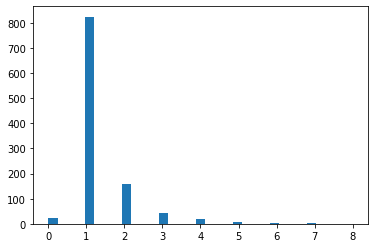

In [5]:
plt.hist(dist[25], bins='sqrt') # пример распределения 
#dist[25]

In [6]:
ph_mean = np.array(ph).mean(axis=1)
pv_mean = np.array(pv).mean(axis=1)
phv_mean = np.array(phv).mean(axis=1)

ph_max = np.array(ph).max(axis=1)
pv_max = np.array(pv).max(axis=1)
phv_max = np.array(phv).max(axis=1)

ph_min = np.array(ph).min(axis=1)
pv_min = np.array(pv).min(axis=1)
phv_min = np.array(phv).min(axis=1)

<ErrorbarContainer object of 3 artists>

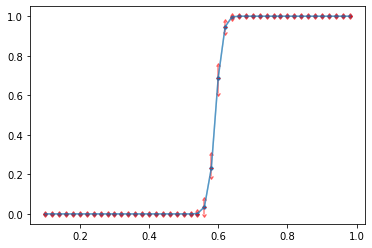

In [7]:
# Зависимость вероятности протекания по горизонтали от концентрации
plt.scatter(p, ph_mean, s=10)
plt.errorbar(p, ph_mean, ph_max - ph_mean, lolims=True, ecolor='red', alpha=0.5, capsize=2)
plt.errorbar(p, ph_mean, ph_mean - ph_min, uplims=True, ecolor='red', alpha=0.5, capsize=2)

<ErrorbarContainer object of 3 artists>

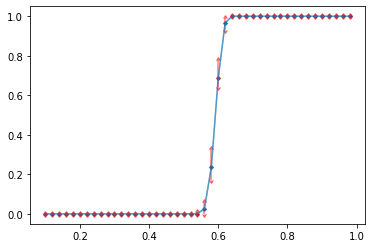

In [8]:
# Зависимость вероятности протекания по вертикали от концентрации
plt.scatter(p, pv_mean, s=10)
plt.errorbar(p, pv_mean, pv_max - pv_mean, lolims=True, ecolor='red', alpha=0.5, capsize=2)
plt.errorbar(p, pv_mean, pv_mean - pv_min, uplims=True, ecolor='red', alpha=0.5, capsize=2)

<ErrorbarContainer object of 3 artists>

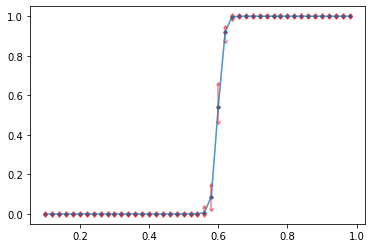

In [9]:
# Зависимость вероятности протекания по обоим направлениям от концентрации
plt.scatter(p, phv_mean, s=10)
plt.errorbar(p, phv_mean, phv_max - phv_mean, lolims=True, ecolor='red', alpha=0.5, capsize=2)
plt.errorbar(p, phv_mean, phv_mean - phv_min, uplims=True, ecolor='red', alpha=0.5, capsize=2)